In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers[torch]
!pip install datasets
!pip install transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 4.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# 데이터 불러오기

In [3]:
DF = pd.read_csv('/content/drive/MyDrive/Final.csv')
DF['product'] = DF['product'].replace('Money transfer, virtual currency, or money service', 'Money transfer')
DF= DF[['consumer complaint narrative','product','issue']]
DF

,consumer complaint narrative,product,issue
0,I made a purchase with XXXX to purchase a prod...,Credit card,Problem with a purchase shown on your statement
1,i asked the JC Penny store employee if there w...,Credit card,Getting a credit card
2,"Synchrony Bank, who owns the stores credit car...",Credit card,Closing your account
3,This bank doesnt value me as a customer or my ...,Credit card,"Other features, terms, or problems"
4,Purchase from XXXX on XX/XX/XXXX XXXX XXXX on ...,Credit card,Problem with a purchase shown on your statement
...,...,...,...
1326536,XX/XX/2022 Truist checking account fraudulentl...,Checking or savings account,Opening an account
1326537,We had 3 savings/investment account that were ...,Checking or savings account,Managing an account
1326538,Please refer all my complaints about Keybank. ...,Checking or savings account,Closing an account
1326539,There is a company name XXXX which provides t...,Checking or savings account,Problem with a lender or other company chargin...


In [4]:
DF_Student = DF[DF['product'] == 'Student loan']
DF_Student

,consumer complaint narrative,product,issue
120943,"On XX/XX/XXXX and XXXX, I received the attache...",Student loan,Dealing with your lender or servicer
120944,"Greetings, Upon on the resumption of student l...",Student loan,Dealing with your lender or servicer
120945,Mohela is supposed to process my public servic...,Student loan,Dealing with your lender or servicer
120946,I am a participant of the Public Service Loan ...,Student loan,Dealing with your lender or servicer
120947,I have been trying to deal with this company s...,Student loan,Dealing with your lender or servicer
...,...,...,...
143840,I was given incorrect information from MOHELA ...,Student loan,Dealing with your lender or servicer
143841,"I have a student loan with XXXX XXXX, XXXX. I ...",Student loan,Dealing with your lender or servicer
143842,My student loans were recently in an in-school...,Student loan,Struggling to repay your loan
143843,I am currently an anesthesiology resident phys...,Student loan,Dealing with your lender or servicer


# 자연어처리

In [5]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
data = list(DF_Student['consumer complaint narrative'])
clean = []
for narrative in (data):
 clean_narrative = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》XXXX{}]', '', narrative)
 clean.append(clean_narrative)
DF_Student['narrative'] = clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
lower = [text.lower() for text in DF_Student['narrative'].values]
DF_Student['narrative'] = lower

In [7]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

DF_Student["narrative"]=DF_Student["narrative"].apply(lambda x: remove_stopwords(x))

DF_Student.head()

,consumer complaint narrative,product,issue,narrative
120943,"On XX/XX/XXXX and XXXX, I received the attache...",Student loan,Dealing with your lender or servicer,received attached letters moehla makes zero se...
120944,"Greetings, Upon on the resumption of student l...",Student loan,Dealing with your lender or servicer,greetings upon resumption student loan repayme...
120945,Mohela is supposed to process my public servic...,Student loan,Dealing with your lender or servicer,mohela supposed process public service loan fo...
120946,I am a participant of the Public Service Loan ...,Student loan,Dealing with your lender or servicer,participant public service loan forgiveness pr...
120947,I have been trying to deal with this company s...,Student loan,Dealing with your lender or servicer,trying deal company since 2023 knew student lo...


# 데이터 추출 및 컬럼명 변경

In [8]:
DF_test = DF_Student[['narrative','issue']]
DF_test.columns = ['text', 'label']
DF_test

,text,label
120943,received attached letters moehla makes zero se...,Dealing with your lender or servicer
120944,greetings upon resumption student loan repayme...,Dealing with your lender or servicer
120945,mohela supposed process public service loan fo...,Dealing with your lender or servicer
120946,participant public service loan forgiveness pr...,Dealing with your lender or servicer
120947,trying deal company since 2023 knew student lo...,Dealing with your lender or servicer
...,...,...
143840,given incorrect information mohela regarding c...,Dealing with your lender or servicer
143841,student loan 19 days late one payments receive...,Dealing with your lender or servicer
143842,student loans recently inschool forbearance en...,Struggling to repay your loan
143843,currently anesthesiology resident physician as...,Dealing with your lender or servicer


# 데이터 분할

In [9]:
x = DF_test
Y = DF_test['label']
x_train, x_test, y_train, y_test = train_test_split(x, Y,test_size = 0.1, stratify = Y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(20611, 2) (20611,) (2291, 2) (2291,)


In [ ]:
x_train.head()

,text,label
123124,cash net usa collector call state accessed ban...,Attempts to collect debt not owed
137006,account kay jewlers years back owed credit car...,Took or threatened to take negative or legal a...
9017,attention credit acceptance corporation submit...,Attempts to collect debt not owed
82704,information given regarding account violates f...,Attempts to collect debt not owed
120350,debt collector called work number explained ab...,Communication tactics


In [ ]:
x_test

,text,label
117121,victim identity theft debt belong please see i...,Attempts to collect debt not owed
64273,southwest recovery service put account credit ...,Written notification about debt
150705,tried dispute debt 230000 allstate credit bure...,Attempts to collect debt not owed
79440,never contract company put debit credit took d...,Attempts to collect debt not owed
145745,understand verified account accurate wrong soc...,Communication tactics
...,...,...
62534,writing bring attention credit file contains c...,Attempts to collect debt not owed
114330,someone stole identity opened many accounts wi...,Attempts to collect debt not owed
57506,seen routine provider used previously supplied...,Attempts to collect debt not owed
101093,representatives discover card keep calling ong...,Communication tactics


# 데이터셋 만들기




In [10]:
import transformers
transformers.logging.set_verbosity_error()
import warnings; warnings.filterwarnings('ignore')
import os; os.environ['WANDB_DISABLED'] = 'true'
from datasets import Dataset,Features,Value,ClassLabel, DatasetDict

traindts = Dataset.from_pandas(x_train)
traindts = traindts.class_encode_column("label")
testdts = Dataset.from_pandas(x_test)
testdts = testdts.class_encode_column("label")

Casting to class labels:   0%|          | 0/20611 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/2291 [00:00<?, ? examples/s]

In [11]:
corpus = DatasetDict({"train" : traindts ,
                      "validation" : testdts })
corpus

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 20611
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 2291
    })
})

# 토큰화

In [12]:
from transformers import RobertaConfig, RobertaModel, RobertaTokenizer

In [13]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [14]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [15]:
tokenized_corpus = corpus.map(preprocess_function, batched=True)

Map:   0%|          | 0/20611 [00:00<?, ? examples/s]

Map:   0%|          | 0/2291 [00:00<?, ? examples/s]

# 패딩?

In [16]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding = True,max_length = 128)

# 성능평가 함수

In [17]:
import evaluate
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

# 모델

In [18]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = (AutoModelForSequenceClassification.from_pretrained(
    "roberta-base", num_labels=3).to(device))

cuda


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [16]:
tokenized_corpus["validation"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['Dealing with your lender or servicer', 'Incorrect information on your report', 'Struggling to repay your loan'], id=None),
 '__index_level_0__': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

# 빠인뜌닝

In [19]:
training_args = TrainingArguments(
    output_dir="best_model_Student_loan",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_corpus["train"],
    eval_dataset=tokenized_corpus["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()
trainer.save_model()

{'loss': 0.5376, 'grad_norm': 5.215364933013916, 'learning_rate': 1.6121024049650892e-05, 'epoch': 0.3878975950349108}
{'loss': 0.4582, 'grad_norm': 8.139753341674805, 'learning_rate': 1.2242048099301784e-05, 'epoch': 0.7757951900698216}
{'eval_loss': 0.44816622138023376, 'eval_accuracy': 0.8280226975120035, 'eval_runtime': 47.7623, 'eval_samples_per_second': 47.967, 'eval_steps_per_second': 3.015, 'epoch': 1.0}
{'loss': 0.4346, 'grad_norm': 9.236907958984375, 'learning_rate': 8.363072148952676e-06, 'epoch': 1.1636927851047323}
{'loss': 0.4058, 'grad_norm': 9.732696533203125, 'learning_rate': 4.484096198603569e-06, 'epoch': 1.5515903801396431}
{'loss': 0.3941, 'grad_norm': 14.723043441772461, 'learning_rate': 6.051202482544609e-07, 'epoch': 1.939487975174554}
{'eval_loss': 0.4080142080783844, 'eval_accuracy': 0.83457005674378, 'eval_runtime': 47.8313, 'eval_samples_per_second': 47.898, 'eval_steps_per_second': 3.011, 'epoch': 2.0}
{'train_runtime': 2778.2489, 'train_samples_per_second'

In [20]:
pred_output = trainer.predict(tokenized_corpus["validation"])
pred_output

PredictionOutput(predictions=array([[ 3.1086588 , -3.3243828 ,  0.4533858 ],
       [ 0.9352436 ,  0.7378901 , -2.1514678 ],
       [ 1.5522007 , -3.48769   ,  2.316246  ],
       ...,
       [ 3.6201386 , -3.0343137 , -0.4921293 ],
       [ 3.735497  , -2.619288  , -0.96567565],
       [ 3.067123  , -3.0282347 , -0.02315793]], dtype=float32), label_ids=array([0, 0, 0, ..., 0, 0, 0]), metrics={'test_loss': 0.4080142080783844, 'test_accuracy': 0.83457005674378, 'test_runtime': 47.2392, 'test_samples_per_second': 48.498, 'test_steps_per_second': 3.048})

In [ ]:
print(f'Output Predition: {pred_output.predictions.shape}')
print(pred_output.predictions)

In [21]:
import numpy as np

# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(2291,)
Predictions: [0 0 2 ... 0 0 0]


In [22]:
labels = tokenized_corpus["train"].features["label"].names
y_valid = np.array(tokenized_corpus["validation"]['label'])

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(8,8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm.round(2).copy(), display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.tight_layout()
    plt.show()

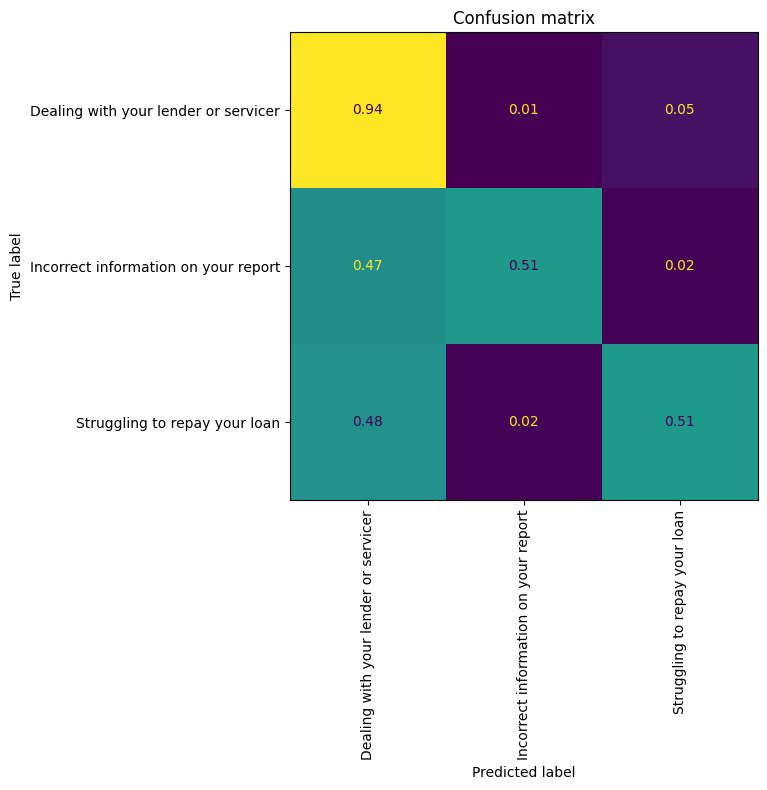

In [24]:
plot_confusion_matrix(y_preds,y_valid,labels)